In [22]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
import numpy as np
%matplotlib inline

In [2]:
digits = datasets.load_digits()

In [4]:
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [9]:
list(zip(['a', 'b', 'c'], [5, 6,7]))

[('a', 5), ('b', 6), ('c', 7)]

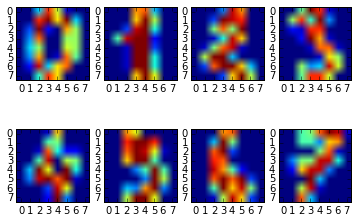

In [18]:
for idx, (image, label) in enumerate(list(zip(digits['images'], digits['target']))[:8]):
    plt.subplot(2, 4, idx + 1)
    plt.imshow(image)

In [6]:
digits['target']

array([0, 1, 2, ..., 8, 9, 8])

In [36]:
num_samples = len(digits.images)

In [37]:
data = digits['images'].reshape(num_samples, -1)

In [35]:
classifier = svm.SVC(gamma=0.01)
classifier.fit(data[:num_samples/2], digits.target[num_samples/2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.01,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [39]:
expected = digits.target[num_samples/2:]
predicted = classifier.predict(data[num_samples/2:])

In [41]:
print(metrics.classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       1.00      0.65      0.79        88
          1       1.00      0.74      0.85        91
          2       1.00      0.64      0.78        86
          3       1.00      0.64      0.78        91
          4       1.00      0.55      0.71        92
          5       0.93      0.98      0.95        91
          6       1.00      0.68      0.81        91
          7       1.00      0.49      0.66        89
          8       0.25      1.00      0.40        88
          9       1.00      0.61      0.76        92

avg / total       0.92      0.70      0.75       899



In [42]:
print(metrics.confusion_matrix(expected, predicted))

[[57  0  0  0  0  0  0  0 31  0]
 [ 0 67  0  0  0  0  0  0 24  0]
 [ 0  0 55  0  0  0  0  0 31  0]
 [ 0  0  0 58  0  2  0  0 31  0]
 [ 0  0  0  0 51  0  0  0 41  0]
 [ 0  0  0  0  0 89  0  0  2  0]
 [ 0  0  0  0  0  0 62  0 29  0]
 [ 0  0  0  0  0  0  0 44 45  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  0  0  5  0  0 31 56]]


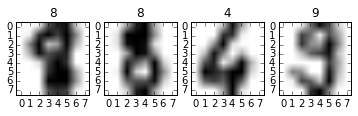

In [51]:
for idx, (image, prediction) in enumerate(list(zip(digits.images[num_samples/2:], predicted))[:4]):
    plt.subplot(2, 4, idx+5)
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title(prediction)

Kaggle digits recognizer
============

In [52]:
import pandas as pd

In [115]:
train = pd.read_csv("/Users/andrewsturges/kaggle/digit_recognizer/train.csv")
train = train.drop('label', axis=1)
train.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
test = pd.read_csv("/Users/andrewsturges/kaggle/digit_recognizer/test.csv")
test.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


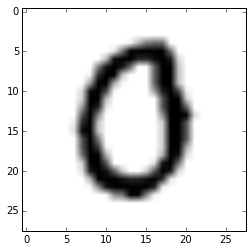

In [113]:
plt.imshow(np.reshape(test.ix[100].values, (28, 28)), cmap=plt.cm.gray_r)

In [120]:
labels = train['label']
train = train.drop('label', axis=1)
train.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
num_samples = train.shape[0]
classifier = svm.SVC(gamma=0.01)
classifier.fit(train[:num_samples/2], labels[:num_samples/2])  # quadratic and sloooooow

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.01,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [126]:
expected = labels[num_samples/2:]
predicted = classifier.predict(train[num_samples/2:])

In [129]:
predicted

array([1, 1, 1, ..., 1, 1, 1])

In [130]:
print(metrics.classification_report(expected.values, predicted))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      2088
          1       0.11      1.00      0.20      2312
          2       0.00      0.00      0.00      2069
          3       0.00      0.00      0.00      2174
          4       0.00      0.00      0.00      1997
          5       0.00      0.00      0.00      1897
          6       0.00      0.00      0.00      2062
          7       0.00      0.00      0.00      2234
          8       0.00      0.00      0.00      2058
          9       0.00      0.00      0.00      2109

avg / total       0.01      0.11      0.02     21000



/Users/andrewsturges/env/lib/python2.7/site-packages/sklearn/metrics/metrics.py:1771: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [131]:
print(metrics.confusion_matrix(expected.values, predicted))

[[   0 2088    0    0    0    0    0    0    0    0]
 [   0 2312    0    0    0    0    0    0    0    0]
 [   0 2069    0    0    0    0    0    0    0    0]
 [   0 2174    0    0    0    0    0    0    0    0]
 [   0 1997    0    0    0    0    0    0    0    0]
 [   0 1897    0    0    0    0    0    0    0    0]
 [   0 2062    0    0    0    0    0    0    0    0]
 [   0 2234    0    0    0    0    0    0    0    0]
 [   0 2058    0    0    0    0    0    0    0    0]
 [   0 2109    0    0    0    0    0    0    0    0]]
